In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
players = pd.read_csv('players.csv')
appearances = pd.read_csv('appearances.csv')
games = pd.read_csv('games.csv')


In [3]:
Full_Player_Data = players.merge(appearances, on='player_id')
Full_Player_Data = Full_Player_Data.merge(games[['game_id','season']], on='game_id')
Full_Player_Data = Full_Player_Data.sort_values(by='market_value_in_eur', ascending=False)
Full_Player_Data.columns

Index(['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'contract_expiration_date', 'agent_name',
       'image_url', 'url', 'current_club_domestic_competition_id',
       'current_club_name', 'market_value_in_eur',
       'highest_market_value_in_eur', 'appearance_id', 'game_id',
       'player_club_id', 'player_current_club_id', 'date', 'player_name',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'season'],
      dtype='object')

In [4]:
Full_Player_Data.drop(
    columns=['first_name', 'last_name', 'city_of_birth', 'contract_expiration_date', 'image_url', 'url', 'agent_name',
             'highest_market_value_in_eur', 'game_id', 'player_id', 'player_club_id', 
             'player_current_club_id', 'competition_id', 'current_club_id', 'player_code', 'country_of_birth',
             'date', 'last_season', 'player_name'], inplace=True
)
Full_Player_Data = Full_Player_Data[Full_Player_Data['season'].isin([2024])]

In [5]:
# Making dataframe with the sum of cetain attributes
Player_stats = Full_Player_Data.groupby('name').agg({
    'yellow_cards': 'sum', 
    'red_cards': 'sum', 
    'goals': 'sum', 
    'assists': 'sum',
    'minutes_played': 'sum',
    'appearance_id': 'count'
}).reset_index()

Player_stats


,name,yellow_cards,red_cards,goals,assists,minutes_played,appearance_id
0,Aaron Ciammaglichella,0,0,0,0,1,1
1,Aaron Cresswell,1,0,0,0,118,6
2,Aaron Essel,4,0,0,1,596,10
3,Aaron Meijers,1,1,0,0,516,8
4,Aaron Ramsdale,1,0,0,0,900,10
...,...,...,...,...,...,...,...
5716,İlker Karakaş,0,0,0,1,32,4
5717,İrfan Can Kahveci,2,0,1,2,690,20
5718,İsmail Köybaşı,1,0,0,0,249,12
5719,İsmail Yüksek,3,0,0,0,1189,19


In [6]:
# Merging and cleaning
Full_Player_Data.drop(columns=['yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played', 'appearance_id'], inplace=True)
Full_Player_Data = Full_Player_Data.merge(Player_stats, how='left', on='name')
Full_Player_Data.rename(columns={'appearance_id': 'appearances'}, inplace=True)
Full_Player_Data.drop_duplicates(inplace=True)
Full_Player_Data.dropna(inplace=True)
Full_Player_Data

,name,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name,market_value_in_eur,season,yellow_cards,red_cards,goals,assists,minutes_played,appearances
0,Vinicius Junior,Brazil,2000-07-12 00:00:00,Left Winger,Attack,right,176.0,ES1,Real Madrid Club de Fútbol,200000000.0,2024,8,0,13,9,1639,20
20,Erling Haaland,Norway,2000-07-21 00:00:00,Centre-Forward,Attack,left,195.0,GB1,Manchester City Football Club,200000000.0,2024,2,0,18,1,2032,23
43,Kylian Mbappé,France,1998-12-20 00:00:00,Centre-Forward,Attack,right,178.0,ES1,Real Madrid Club de Fútbol,180000000.0,2024,2,0,12,2,1797,22
63,Jude Bellingham,England,2003-06-29 00:00:00,Attacking Midfield,Midfield,right,186.0,ES1,Real Madrid Club de Fútbol,180000000.0,2024,4,0,7,6,1667,20
85,Bukayo Saka,England,2001-09-05 00:00:00,Right Winger,Attack,left,178.0,GB1,Arsenal Football Club,150000000.0,2024,3,0,9,12,1784,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70805,Thomas Mikkelsen,Denmark,1983-08-27 00:00:00,Goalkeeper,Goalkeeper,right,190.0,DK1,Brøndby Idrætsforening,25000.0,2024,0,0,0,0,180,2
70807,Enock Otoo,Ghana,2004-06-28 00:00:00,Attacking Midfield,Midfield,right,175.0,DK1,Lyngby Boldklubben af 1921,25000.0,2024,0,0,0,0,32,2
70809,Timo Jansink,Netherlands,2003-03-16 00:00:00,Goalkeeper,Goalkeeper,right,197.0,NL1,Heracles Almelo,25000.0,2024,0,0,0,0,90,1
70810,Alaixys Romao,Togo,1984-01-18 00:00:00,Defensive Midfield,Midfield,right,180.0,GR1,Athens Kallithea Football Club,25000.0,2024,0,0,0,0,120,1


In [7]:
# Adding age column
Full_Player_Data['date_of_birth'] = pd.to_datetime(Full_Player_Data['date_of_birth'])
today = pd.to_datetime('today')
Full_Player_Data['age'] = (today - Full_Player_Data['date_of_birth']).dt.days // 365
Full_Player_Data.drop(columns=['date_of_birth'])

,name,country_of_citizenship,sub_position,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name,market_value_in_eur,season,yellow_cards,red_cards,goals,assists,minutes_played,appearances,age
0,Vinicius Junior,Brazil,Left Winger,Attack,right,176.0,ES1,Real Madrid Club de Fútbol,200000000.0,2024,8,0,13,9,1639,20,24
20,Erling Haaland,Norway,Centre-Forward,Attack,left,195.0,GB1,Manchester City Football Club,200000000.0,2024,2,0,18,1,2032,23,24
43,Kylian Mbappé,France,Centre-Forward,Attack,right,178.0,ES1,Real Madrid Club de Fútbol,180000000.0,2024,2,0,12,2,1797,22,26
63,Jude Bellingham,England,Attacking Midfield,Midfield,right,186.0,ES1,Real Madrid Club de Fútbol,180000000.0,2024,4,0,7,6,1667,20,21
85,Bukayo Saka,England,Right Winger,Attack,left,178.0,GB1,Arsenal Football Club,150000000.0,2024,3,0,9,12,1784,22,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70805,Thomas Mikkelsen,Denmark,Goalkeeper,Goalkeeper,right,190.0,DK1,Brøndby Idrætsforening,25000.0,2024,0,0,0,0,180,2,41
70807,Enock Otoo,Ghana,Attacking Midfield,Midfield,right,175.0,DK1,Lyngby Boldklubben af 1921,25000.0,2024,0,0,0,0,32,2,20
70809,Timo Jansink,Netherlands,Goalkeeper,Goalkeeper,right,197.0,NL1,Heracles Almelo,25000.0,2024,0,0,0,0,90,1,21
70810,Alaixys Romao,Togo,Defensive Midfield,Midfield,right,180.0,GR1,Athens Kallithea Football Club,25000.0,2024,0,0,0,0,120,1,41


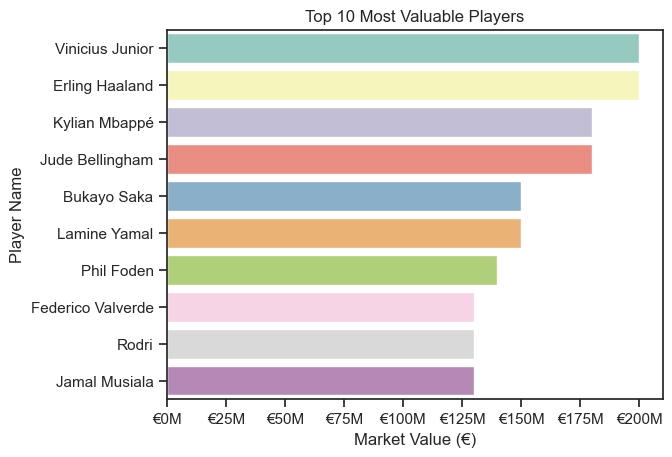

In [8]:
Top_10_Players = Full_Player_Data.head(10)

sns.set_theme(style="ticks")
sns.barplot(data=Top_10_Players, x='market_value_in_eur', y='name', hue='name', palette='Set3')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'€{int(x/1000000)}M'))
plt.title('Top 10 Most Valuable Players')
plt.xlabel('Market Value (€)')
plt.ylabel('Player Name')
plt.show()


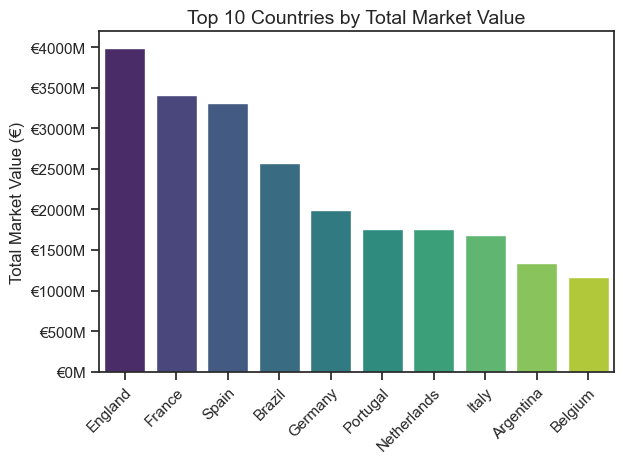

In [9]:
Top_10_Countries = (Full_Player_Data.groupby('country_of_citizenship')['market_value_in_eur'].sum().sort_values(ascending=False).head(10))

sns.set_theme(style="ticks")
sns.barplot(x=Top_10_Countries.index, y=Top_10_Countries.values, hue=Top_10_Countries.index, palette='viridis')
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'€{int(y/1000000)}M'))
plt.title('Top 10 Countries by Total Market Value', fontsize=14)
plt.xlabel('')
plt.ylabel('Total Market Value (€)', fontsize=12)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.tight_layout()
plt.show()


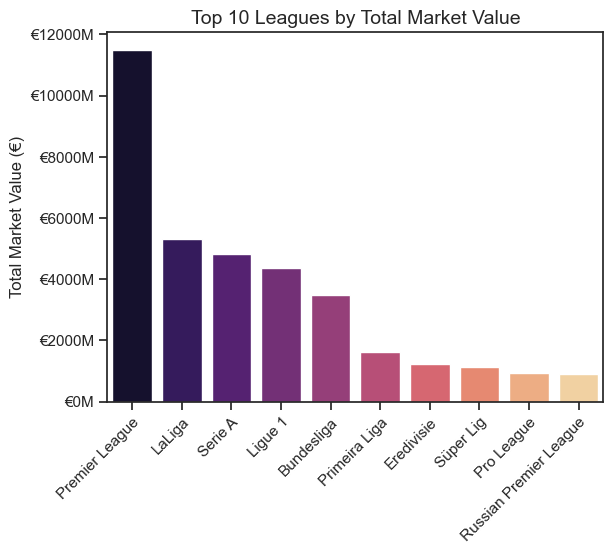

In [18]:
Top_10_Leagues = Full_Player_Data.groupby('current_club_domestic_competition_id')['market_value_in_eur'].sum().sort_values(ascending=False).head(10)

# Fill out the corresponding league names for the IDs
league_names = [
    "Premier League",   # GB1
    "LaLiga",           # ES1
    "Serie A",          # IT1
    "Ligue 1",          # FR1
    "Bundesliga",       # L1
    "Primeira Liga",    # PO1
    "Eredivisie",       # NL1
    "Süper Lig",        # TR1
    "Pro League",       # BE1
    "Russian Premier League", # RU1
]

sns.set_theme(style="ticks") 
sns.barplot(x=league_names, y=Top_10_Leagues.values, hue=league_names, palette='magma')
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'€{int(y/1000000)}M'))

plt.title('Top 10 Leagues by Total Market Value', fontsize=14)
plt.xlabel('')
plt.ylabel('Total Market Value (€)', fontsize=12)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

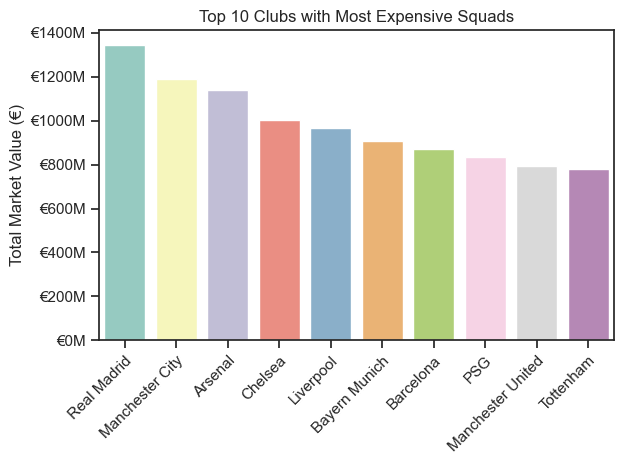

In [12]:
Top_10_Clubs = Full_Player_Data.groupby('current_club_name')['market_value_in_eur'].sum().sort_values(ascending=False).head(10)

# Shorten the club names
short_club_list = [
    "Real Madrid", "Manchester City", "Arsenal", "Chelsea", 
    "Liverpool", "Bayern Munich", "Barcelona", "PSG", 
    "Manchester United", "Tottenham"
]
sns.set_theme(style="ticks")
sns.barplot (x=short_club_list, y=Top_10_Clubs.values, hue=short_club_list, palette='Set3')
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'€{int(y/1000000)}M'))
plt.title('Top 10 Clubs with Most Expensive Squads')
plt.xlabel('')
plt.ylabel('Total Market Value (€)')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.tight_layout()
plt.show()

In [13]:
columns_of_interest = ['market_value_in_eur', 'goals', 'assists', 'age', 'height_in_cm', 'yellow_cards', 'red_cards', 'minutes_played']
correlation = Full_Player_Data[columns_of_interest].corr()
market_value_correlations = correlation['market_value_in_eur'].sort_values(ascending=False)
print(market_value_correlations)


market_value_in_eur    1.000000
goals                  0.351030
assists                0.309555
minutes_played         0.263624
yellow_cards           0.120539
height_in_cm           0.002154
red_cards             -0.014080
age                   -0.101944
Name: market_value_in_eur, dtype: float64


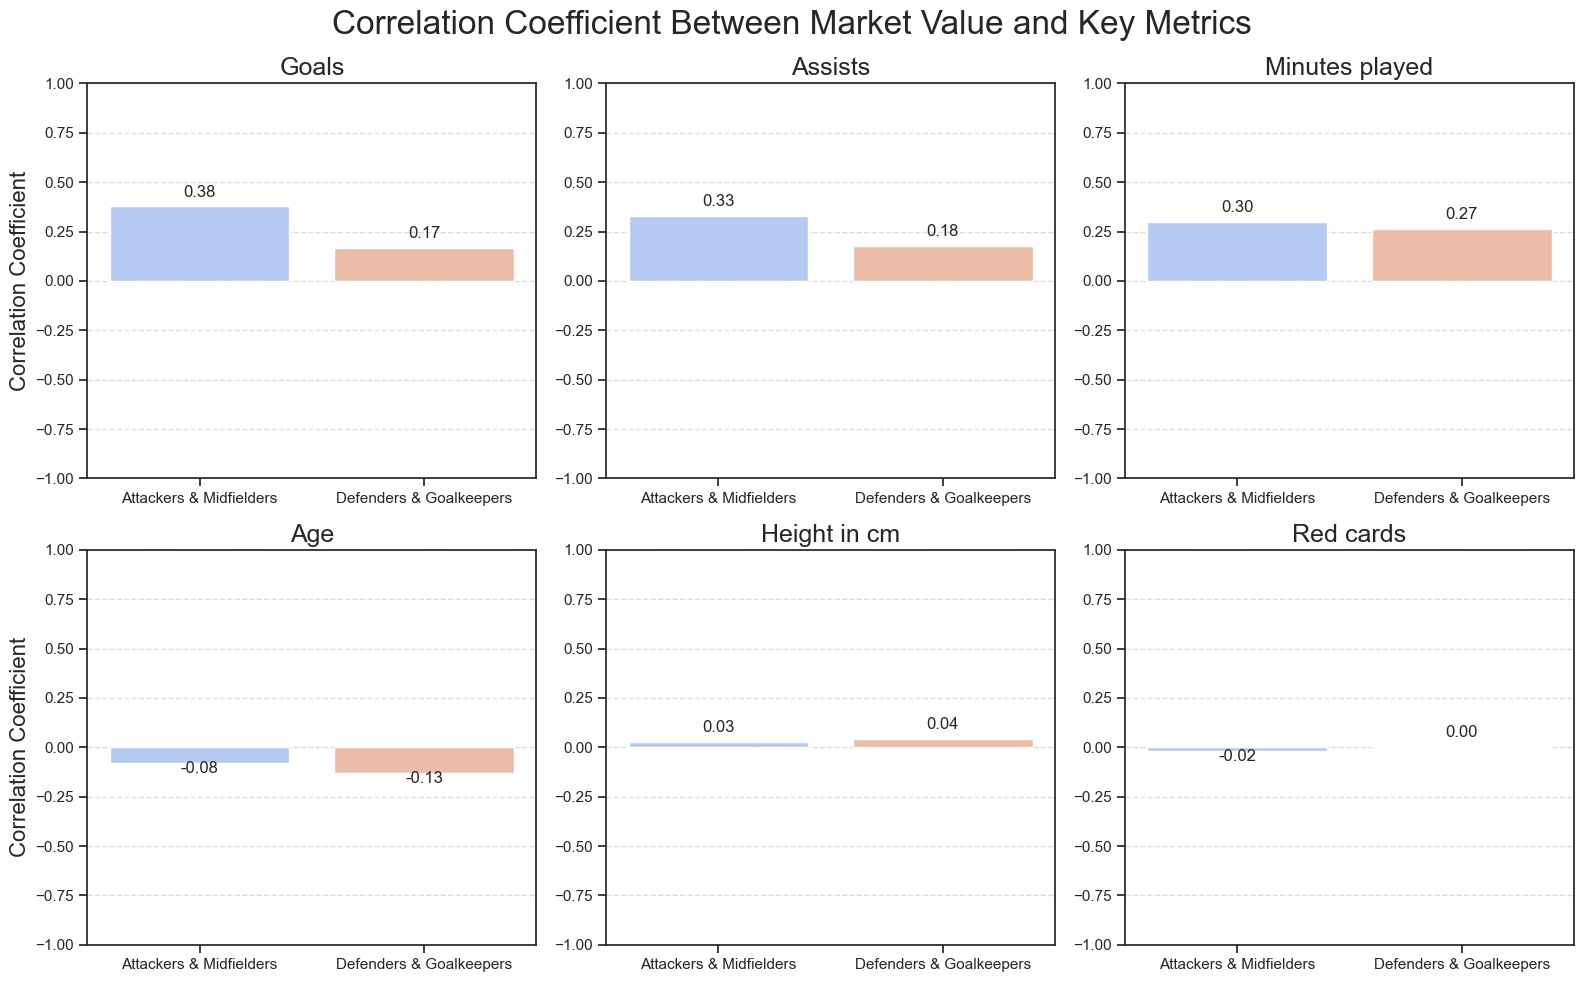

In [14]:
attributes = ['goals', 'assists', 'minutes_played', 'age', 'height_in_cm', 'red_cards']

attack_midfield = Full_Player_Data[Full_Player_Data['position'].isin(['Attack', 'Midfield'])]
defender_goalkeeper = Full_Player_Data[Full_Player_Data['position'].isin(['Defender', 'Goalkeeper'])]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))  
fig.suptitle('Correlation Coefficient Between Market Value and Key Metrics', fontsize=24)

# Loop through each attribute and plot its bar chart
for i, attr in enumerate(attributes):
    
    attack_midfield_corr = attack_midfield[[attr, 'market_value_in_eur']].corr().iloc[0, 1]
    defender_goalkeeper_corr = defender_goalkeeper[[attr, 'market_value_in_eur']].corr().iloc[0, 1]

    # Create a DataFrame for the current attribute's correlations
    correlation_df = pd.DataFrame({
        'Group': ['Attackers & Midfielders', 'Defenders & Goalkeepers'],
        'Correlation': [attack_midfield_corr, defender_goalkeeper_corr]
    })

    # Position in the 2x3 grid
    ax = axes[i // 3, i % 3]

    sns.barplot(x='Group', y='Correlation', hue='Group', data=correlation_df, palette='coolwarm', dodge=False, ax=ax)
    ax.set_title(f'{attr.replace("_", " ").capitalize()}', fontsize=18)
    ax.set_ylim(-1, 1)  
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_xlabel('')

    if i % 3 == 0: 
        ax.set_ylabel('Correlation Coefficient', fontsize=16)
    else:
        ax.set_ylabel('') 

    # Annotate bars with the exact correlation values
    for j, value in enumerate(correlation_df['Correlation']):
        ax.text(j, value + 0.05 if value > 0 else value - 0.05, f'{value:.2f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()




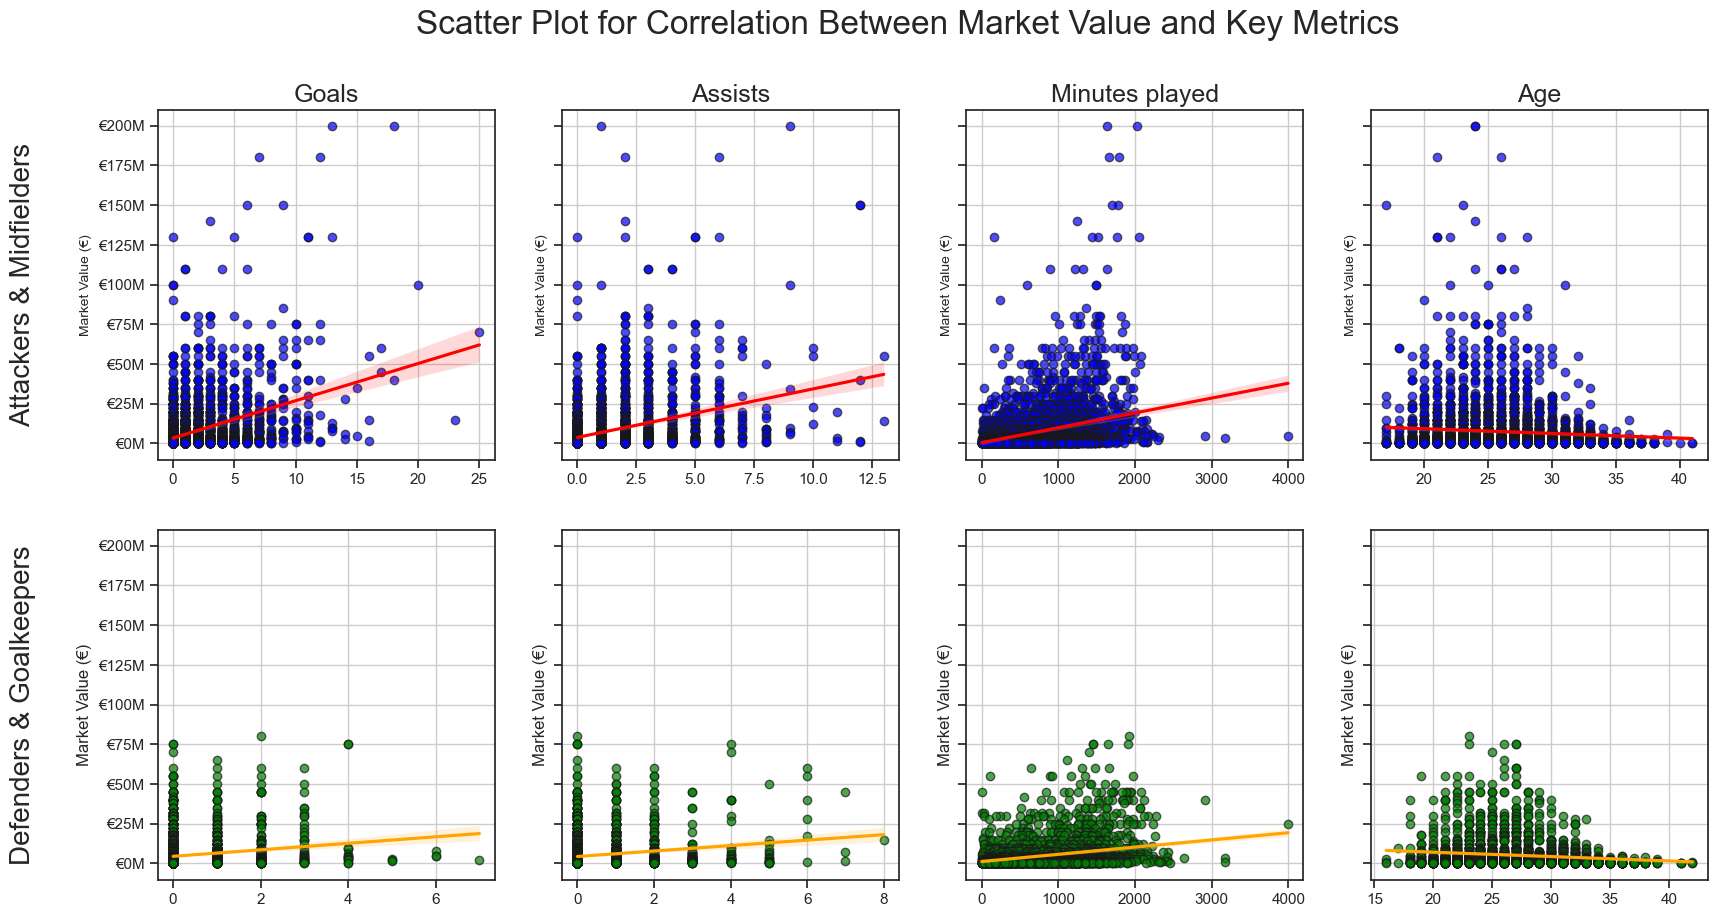

In [15]:
attributes_2 = ['goals', 'assists', 'minutes_played', 'age']

fig, axes = plt.subplots(2, len(attributes_2), figsize=(20, 10), sharey=True) 
fig.suptitle('Scatter Plot for Correlation Between Market Value and Key Metrics', fontsize=24)

# Add row-specific titles
axes[0, 0].annotate(
    'Attackers & Midfielders', xy=(0.5, 0.5), xytext=(-0.4, 0.5),
    textcoords='axes fraction', fontsize=20, ha='center', va='center', rotation=90
)

axes[1, 0].annotate(
    'Defenders & Goalkeepers', xy=(0.5, 0.5), xytext=(-0.4, 0.5),
    textcoords='axes fraction', fontsize=20, ha='center', va='center', rotation=90
)

for i, attr in enumerate(attributes_2):

    sns.regplot(
        x=attack_midfield[attr],
        y=attack_midfield['market_value_in_eur'],
        scatter_kws={'alpha': 0.7, 'color': 'blue', 'edgecolor': 'k'},
        line_kws={'color': 'red'},
        ax=axes[0, i]
    )
    axes[0, i].set_title(f'{attr.replace("_", " ").capitalize()}', fontsize=18)
    axes[0, i].set_xlabel('')
    axes[0, i].set_ylabel('Market Value (€)', fontsize=10)
    axes[0, i].grid(True)

    ax = axes[0, i]
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'€{int(y / 1000000)}M'))

    sns.regplot(
        x=defender_goalkeeper[attr],
        y=defender_goalkeeper['market_value_in_eur'],
        scatter_kws={'alpha': 0.7, 'color': 'green', 'edgecolor': 'k'},
        line_kws={'color': 'orange'},
        ax=axes[1, i]
    )
    axes[1, i].set_title('')
    axes[1, i].set_xlabel('')
    axes[1, i].set_ylabel('Market Value (€)', fontsize=12)
    axes[1, i].grid(True)


plt.show()

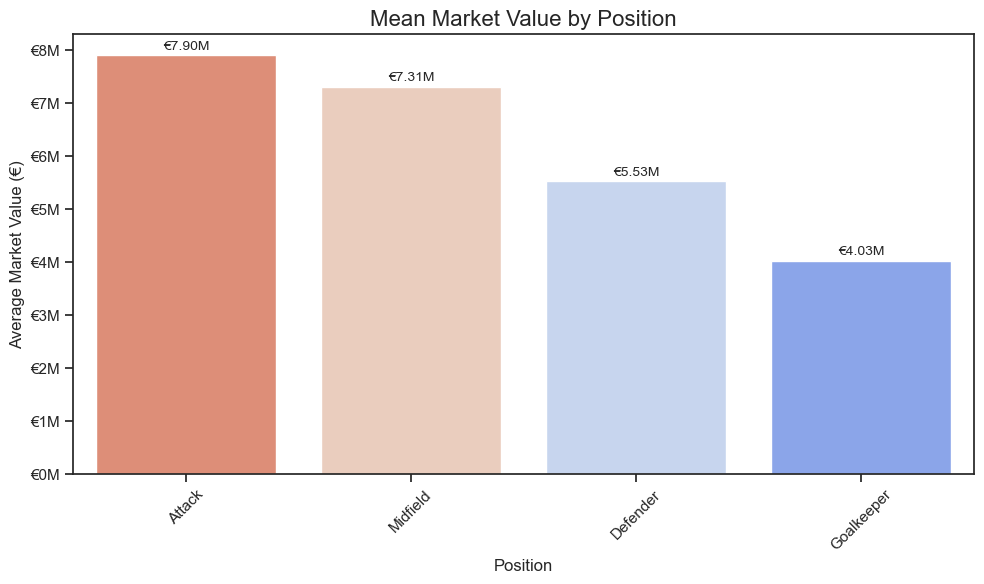

In [16]:
position_stats = Full_Player_Data.groupby('position')['market_value_in_eur'].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=position_stats.index, y=position_stats['mean'], hue=position_stats.index, palette='coolwarm_r')
for i, value in enumerate(position_stats['mean']):
    plt.text(i, value + 100000, f'€{value / 1_000_000:.2f}M', ha='center', fontsize=10)
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'€{int(y/1000000)}M'))
plt.title('Mean Market Value by Position', fontsize=16)
plt.xlabel('Position', fontsize=12)
plt.ylabel('Average Market Value (€)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

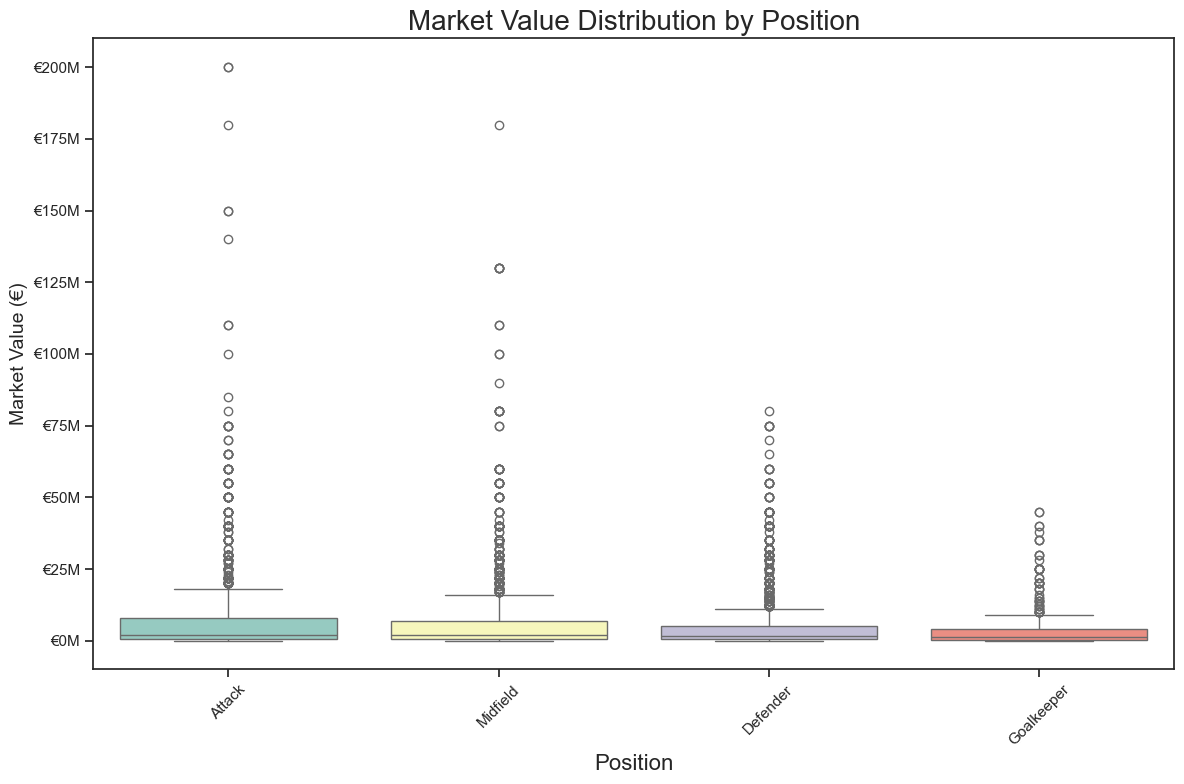

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='position', y='market_value_in_eur', data=Full_Player_Data, hue='position', palette='Set3')
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'€{int(y/1000000)}M'))
plt.title('Market Value Distribution by Position', fontsize=20)
plt.xlabel('Position', fontsize=16)
plt.ylabel('Market Value (€)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()